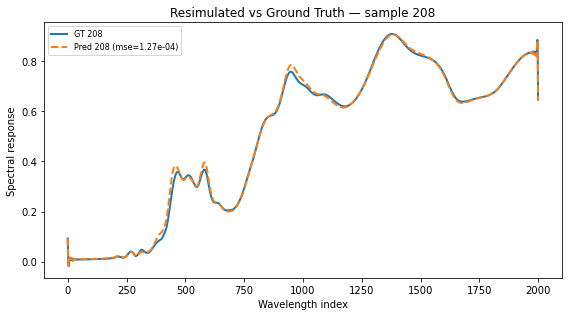

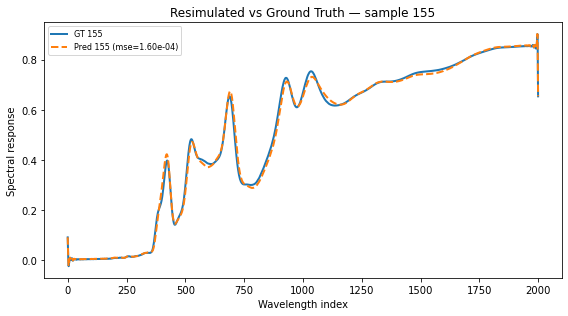

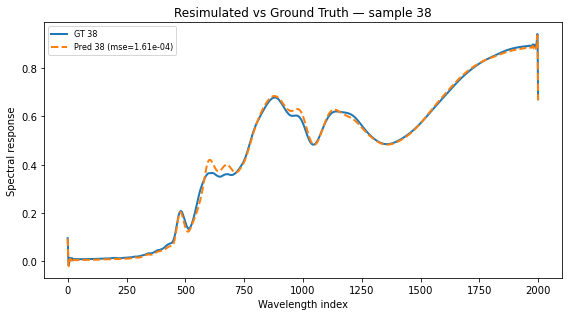

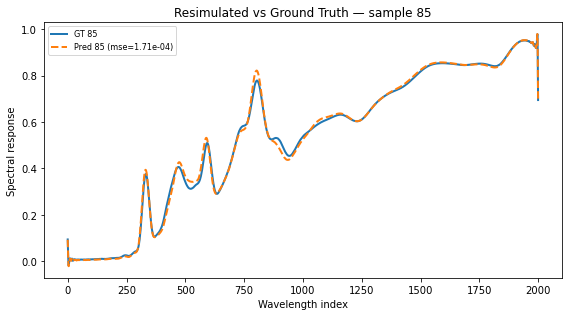

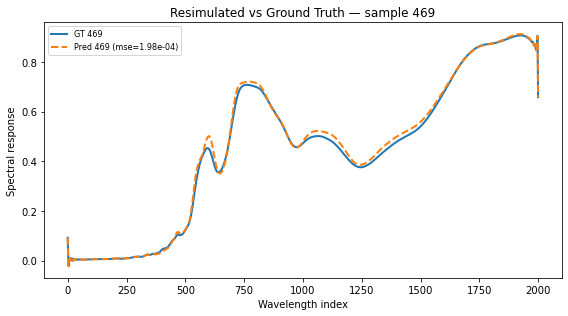

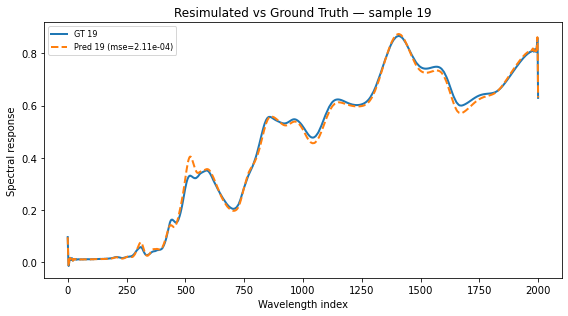

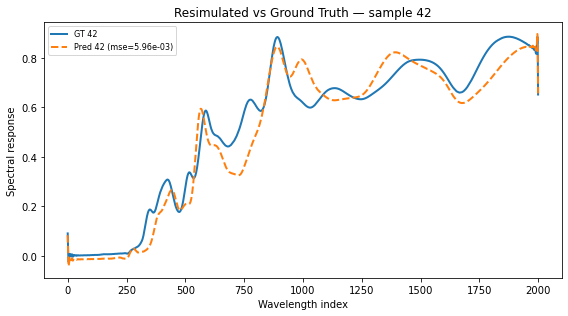

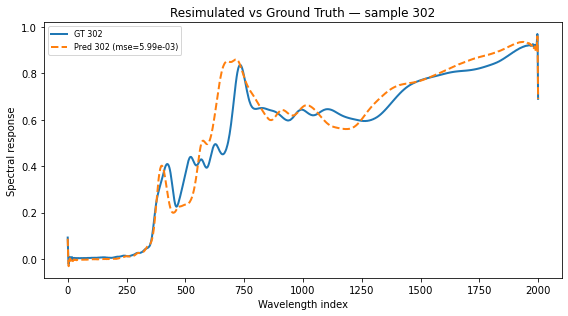

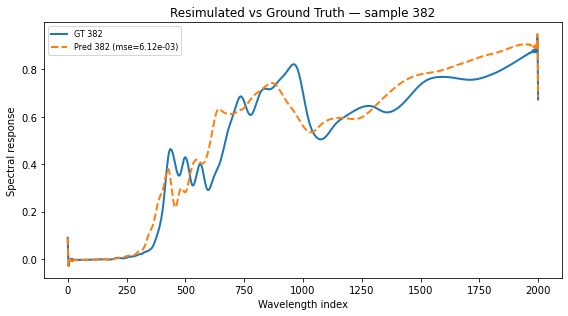

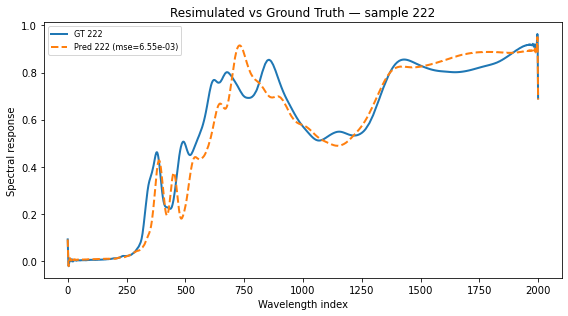

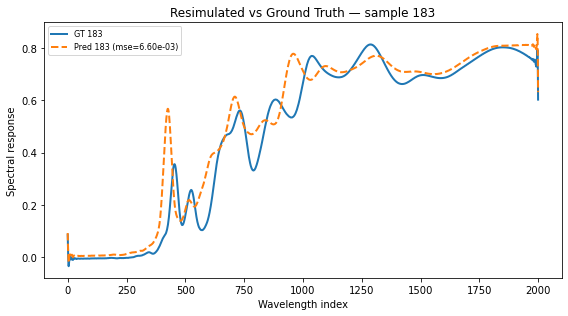

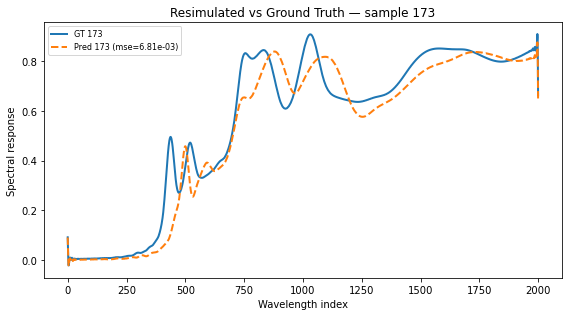

Saved 12 plots to: /data/users/sl636/AEM_DIM_Bench/NA/data/resim_plots


In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

BASE = Path("data")
Y_truth = np.loadtxt(BASE / "test_Ytruth_retrain7Yang_sim_.csv", dtype=float)
Y_pred  = np.loadtxt(BASE / "test_Ypred_retrain7Yang_sim_.csv",  dtype=float)

mse = ((Y_pred - Y_truth)**2).mean(axis=1)
idx_sorted = np.argsort(mse)

k = 6                       
indices = list(idx_sorted[:k]) + list(idx_sorted[-k:])   # best k + worst k
# Or: indices = [0, 5, 42]  # custom picks

out_dir = BASE / "resim_plots"
out_dir.mkdir(parents=True, exist_ok=True)

x = np.arange(Y_truth.shape[1])

for i in indices:
    plt.figure(figsize=(8,4.5))
    plt.plot(x, Y_truth[i], label=f"GT {i}", linewidth=2)
    plt.plot(x, Y_pred[i],  "--", label=f"Pred {i} (mse={mse[i]:.2e})", linewidth=2)
    plt.xlabel("Wavelength index")
    plt.ylabel("Spectral response")
    plt.title(f"Resimulated vs Ground Truth — sample {i}")
    plt.legend(loc="best", fontsize=8)
    plt.tight_layout()

    fout = out_dir / f"spectrum_{i:04d}.png"
    plt.savefig(fout, dpi=200)
    plt.show() 

print(f"Saved {len(indices)} plots to: {out_dir.resolve()}")
